# Model Development

### Objective

We are will develop several models tht will predict the rpice of the using the features we have in out dataframe. This will give us an ideea about price estimates.

The questions we try to answer in this module:
* Is the dealer offering fair value for my trade in?
* Do i put fair value on my car?

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Set the size of the graph

In [57]:
plt.rcParams["figure.figsize"] = (15,6)

## Import the dataset

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Verify the data types of the dataset

In [4]:
df.dtypes.to_frame()

,0
symboling,int64
normalized-losses,int64
make,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64
length,float64


### Save the dataframe localy in case of disaster

In [5]:
df.to_csv("model_building_starting_original.csv")

## Linear Regression and Multiple Linear Regression

Linear Regression is a method that help us to understand the relationship between 2 variables
* the predictor/ independent variable(X)
* the response/ dependent variable(Y)

### Load the library for linearregression

In [6]:
from sklearn.linear_model import LinearRegression

#### Create a Linear regression object:

In [7]:
lm = LinearRegression()
lm

LinearRegression()

How could "highway-mpg" help us predict car price?
We will create a linear function with highway-mpg as the predictor for variable price as the response variable.

In [8]:
df["highway-mpg"].dtypes

dtype('int64')

In [75]:
x_1 = df[["highway-mpg"]]
y_1 = df["price"]

#### Fit the linear model

In [79]:
model_1 = lm.fit(x_1,y_1)

#### Output a Prediction

In [113]:
Yhat = model_1.predict(x_1)
Yhat[0:10]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682])

#### Determine the intercept value

In [80]:
model_1.intercept_

38423.305858157386

#### Determine the value of slope

In [81]:
model_1.coef_

array([-821.73337832])

Our final liner model has the following form:
## Yhat = a + bx

Our result wiil be:
### Price = 38423.31 - 821.73 x highway-mpg

## Practice

Create a regression object called lm1

In [14]:
lm1 = LinearRegression()

#### Train the model using variable engine-size as predictor and price as dependent variable

In [15]:
x = df[["engine-size"]]
y = df["price"]

#### Fit the liniar model

In [16]:
lm1.fit(x,y)

LinearRegression()

#### Find the slope

In [17]:
lm1.coef_

array([166.86001569])

#### Find the intercept

In [18]:
lm1.intercept_

-7963.338906281049

#### Output a prediction

In [19]:
Yhat = lm1.predict(x)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

Our resultin equation based on engine-size would be:
### Yhat = -7693.33 + 166.86 x engine-size

### Linear mode having city-mpg as predictor and price as dependent variable

In [20]:
lm2 = LinearRegression()
x = df[["city-mpg"]]
y = df["price"]
lm2.fit(x,y)

LinearRegression()

In [21]:
Yhat = lm2.predict(x)
Yhat[0:5]

array([16757.08312743, 16757.08312743, 18455.98957651, 14208.72345381,
       19305.44280105])

#### Intercept

In [22]:
lm2.intercept_

34595.600842778265

#### Slope

In [23]:
lm2.coef_

array([-849.45322454])

#### Final Equation is:
### Yhat = 34595.60 - 849.45 x city-mpg

# Multiple Linear Regression

We can predict a more exact variable price by introducing multiple variables.
Explains the relationships between multiple independent variables and one dependent variable.

### Yhat = a + b1x1 + b2x2 + b3x3 + b4x4

Other good predictors of price would be:
* horsepower
* curb-weight
* engine-size
* highway-mpg

In [24]:
z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]

#### Fit the linear model using the above independent variables

In [86]:
lm = LinearRegression()
model_2 = lm.fit(z, df["price"])

#### Value of intercept

In [87]:
intercept = model_2.intercept_
intercept

-15806.624626329198

#### What are the values on coeficients (b1,b2,b3,b4)

In [88]:
coeficients = model_2.coef_
coeficients

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

#### Predict some values

In [91]:
yhat_2 = model_2.predict(z)
yhat_2[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

### Our model equation would be:
### yhat = -15806.624 + 53.495xhorsepower + 4.707xcurb-weight + 81.530xengine-size + 36.057xhighway-mpg

## Practice
#### Create and train a Ultiple Linear regression Model based on independent variables normalized-losses and highway-mpg and dependent variable price

In [29]:
lm3 = LinearRegression()
s = df[["normalized-losses", "highway-mpg"]]

#### Create the model

In [92]:
model_3 = lm3.fit(s, df["price"])

#### Intercept

In [93]:
intercept_3 = model_3.intercept_
intercept_3

38201.31327245728

#### Slopes - coeficient of variables considered

In [94]:
slopes_3 = model_3.coef_
slopes_3

array([   1.49789586, -820.45434016])

#### Predict some variables

In [95]:
yhat_3 = model_3.predict(s)
yhat_3[0:5]

array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047])

### Final equation would be:
### yhat = 38201.31 + 1.497 x normalized-losses - 820.45 x highway-mpg

## Model evaluation using visualisation

#### Import the visualisation package seaborn

In [34]:
import seaborn as sns
%matplotlib inline

#### Create a regression plot
It will show a combination of scatter plot and a fitted linear regression line through the data.  
This will give a estimate of the relationship between the two variables, the strength of the correlation as well as the direction of the correlation.

(0.0, 48180.7585542404)

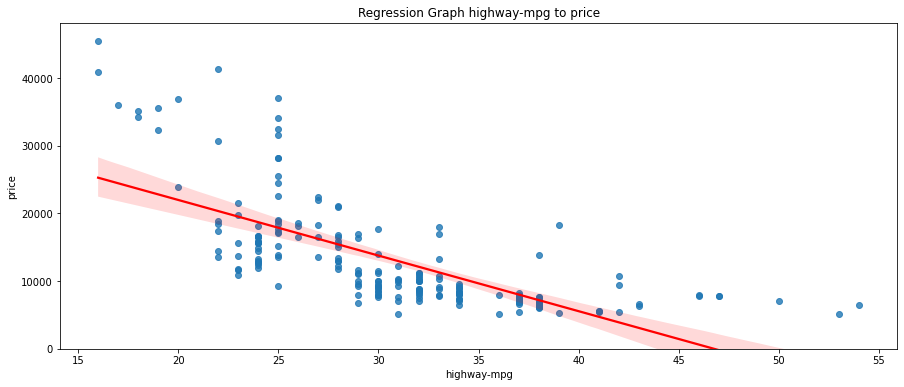

In [58]:
ax = sns.regplot(x= "highway-mpg", y = "price", data = df, line_kws={'color': 'red'})
ax.set_title('Regression Graph highway-mpg to price')
plt.ylim(0, )

#### Create a regplot for peak-rpm to price

(0.0, 47414.1)

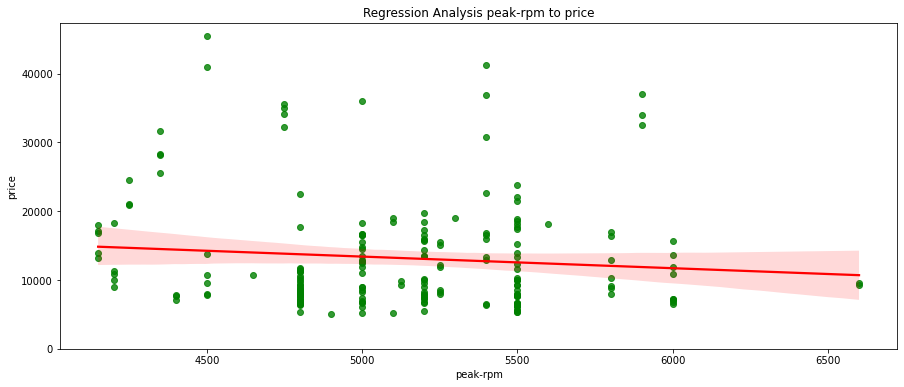

In [59]:
ax1 = sns.regplot(x = "peak-rpm", y = "price", data = df, line_kws={'color': 'red'}, scatter_kws={"color": "green"})
ax1.set_title('Regression Analysis peak-rpm to price')
plt.ylim(0,)

#### Check which variable is more strongly correlated to price

In [37]:
df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


highway-mpg has a higher value close to -1 so this has a stronger correlation to price than peak-rpm

## Residual Plot

A good way to visualise the variance is residual plot  
Residual is the difference between observed value y and predicted value yhat

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


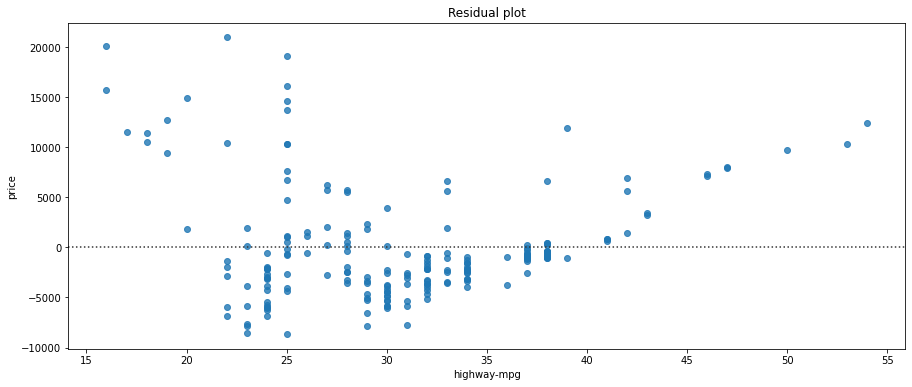

In [60]:
ax_2 = sns.residplot(df["highway-mpg"], df["price"])
ax_2.set_title("Residual plot")
plt.show()

We can see that residuals are not randomly spreaded out around x axis , leading us to believe that a non linear model would be more appropriate in this case

## Visualise a model for Multiple Linear Regression

First lets make a prediction

In [39]:
Yhat = model.predict(z)

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


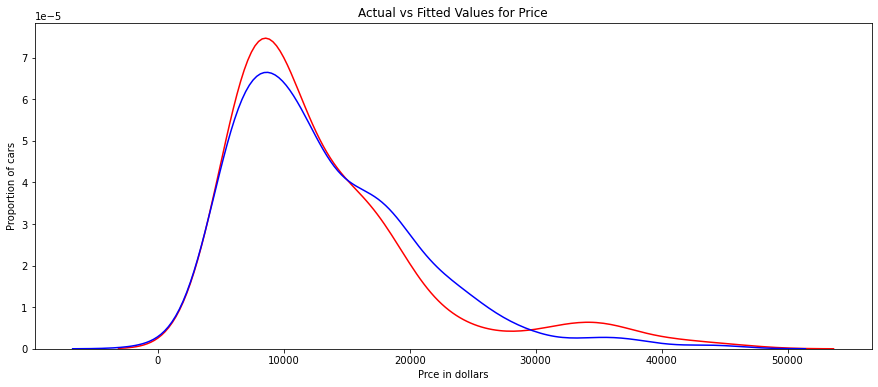

In [61]:
ax_3 = sns.distplot(df["price"], hist = False, color = "r", label = "Actual Value")
ax_4 = sns.distplot(Yhat, hist=False, color = "b", label = "Fitted Values", ax = ax_3)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Prce in dollars")
plt.ylabel("Proportion of cars")

plt.show()
plt.close()

# Polynomial Regression

It is a non linear regression obtained by squaring or setting higher order terms for predictor variables.  

#### Create a function to plot the data

In [41]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, ".", x_new, y_new)
    
    plt.title("Polynomial Fit with Matplotlib for Price ~ Length")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    
    plt.xlabel(Name)
    plt.ylabel("Price of cars")

    plt.show()
    plt.close()

#### Let's get the variables:

In [106]:
x = df["highway-mpg"]
y = df["price"]

#### Fit the polynomial using the function polyfit

In [43]:
# we use a polynomial of the 3rd order or cubic
f = np.polyfit(x, y, 3)
# use polynomial function poly1d to display the polynomial function
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


#### Plot the function 

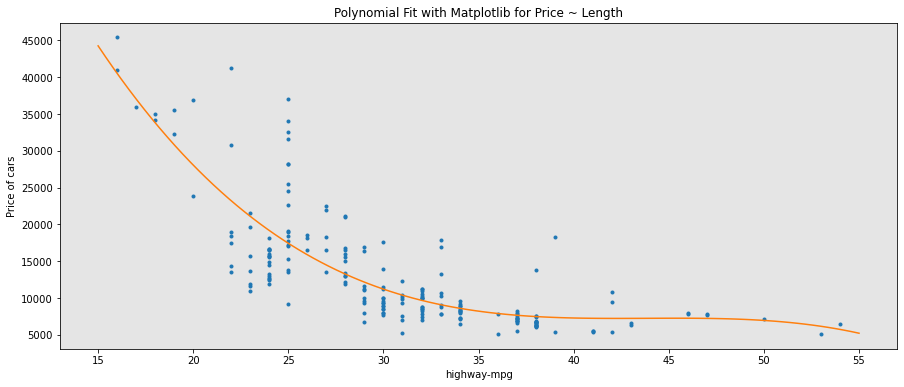

In [62]:
PlotPolly(p, x, y, "highway-mpg")

#### Create 11 order polynomial model with the variable x and y

In [45]:
f_11 = np.polyfit(x, y, 11)
p_11 = np.poly1d(f_11)
print(p_11)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


#### Plot the polynomial model of the 11th order

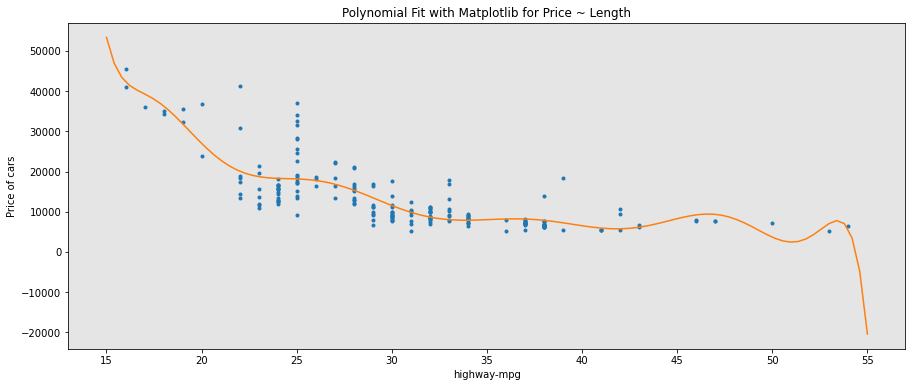

In [63]:
PlotPolly(p_11,x,y,"highway-mpg")

#### Polynomial Transform on multiple features

#### Import the necessary module

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
# create a Polynomial Feature object:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

this is our independent variables:  
z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]

In [49]:
z_pr = pr.fit_transform(z)

In the original data there are 201 samples and 4 features

In [50]:
z.shape

(201, 4)

This is what we obtain after transformation

In [51]:
z_pr.shape

(201, 15)

# Pipeline

#### Import the library modules

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

we create a pipeline we have to create a list of tuples including the name of the model or estimator and its corresponding constructor.

In [55]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

we imput the list as an argument to pipeline constructor

In [56]:
pipe = Pipeline(Input)

First we convert the data type z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

In [64]:
z = z.astype(float)

#### Normalise the data, perform a transform and produce a prediction simultaneously

In [67]:
model = pipe.fit(z, y)

In [68]:
ypipe = pipe.predict(z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

#### Create a pipeline that standardises the data and produce a prediction using a linear regression model using the feature z and target y.

In [69]:
Input_1 = [('scale', StandardScaler()), ('model', LinearRegression())]

In [70]:
pipe = Pipeline(Input_1)

In [71]:
model = pipe.fit(z, y)

In [73]:
ypipe_1 = pipe.predict(z)
ypipe[0:10]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

## Measures for In-Sample Evaluation

when evaluating our models we want to visualise the results and want a quantitative measure of model accuracy
* R^2  
* Mean Squared Error  

R^2 indicates how close the data is to the regresson line  
Mean squared error measure the average of the squares of errors, the difference between the actual value (y) and the estimated value (yhat)

#### Simple Linear Regression Model evaluation:  R^2

In [82]:
# highway-mpg fit
# model_1 = lm.fit(x_1, y_1)
# find the R^2
print("The R-squared is: ", model_1.score(x_1,y_1))

The R-squared is:  0.4965911884339175


we can say that 49.659% of the variation of the prive var is explain by this simple linear model

#### Calculate Mean Squared Error

In [83]:
yhat_1 = model_1.predict(x_1)
print("The output of the first four predicted values is: ", yhat_1[0:4])

The output of the first four predicted values is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


#### Import the function mean_squared_error from the module metrics

In [84]:
from sklearn.metrics import mean_squared_error

Compare the actual values to the predicted values

In [85]:
mse = mean_squared_error(df['price'], yhat_1)
print("The mean squared error of price and predicted value is: ", mse)

The mean squared error of price and predicted value is:  31635042.944639895


## Evaluate the Multiple Linear Regression model 2

In [100]:
# fit the model
model_2_multifit = lm.fit(z, df['price'])
# find R^2
print('The R^2 is: ', model_2_multifit.score(z, df['price']))

The R^2 is:  0.8093562806577457


in this case with multiple variables we can observe that our model fits 80.93% of the variation of price data

#### Calculate the mean squared errors

In [103]:
# create a prediction
yhat_2_multifit = model_2_multifit.predict(z)
yhat_2_multifit[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

compare the predicted values to the actual values of variable price

In [104]:
print('The mean of squared errors of price and predicted value using multifit is: ', \
    mean_squared_error(df['price'], yhat_2_multifit))

The mean of squared errors of price and predicted value using multifit is:  11980366.87072649


## Evaluate the Polinomial fit model 3

In [105]:
# calculate R^2
# import the function r2_score from the module metrics as we are using a different function
from sklearn.metrics import r2_score

In [108]:
# apply the function to get the value of R^2
r_squared = r2_score(y, p(x))
print('The R squared value is: ', r_squared)
# 67.41 % of the variation is explained by our polynomial model

The R squared value is:  0.6741946663906513


In [110]:
# calculate mean squared errors
mse_3 = mean_squared_error(df['price'], p(x))
print('The mean of squared errors of price and predicted value using polynomial is: ', mse_3)

The mean of squared errors of price and predicted value using polynomial is:  20474146.42636125


#### Prediction and Decision Making

In [112]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)
# fit the model
model_1

LinearRegression()

Produce a prediction with our trained model model_1

In [114]:
y_hat = model_1.predict(new_input)
y_hat[0:5]

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

Plot the data

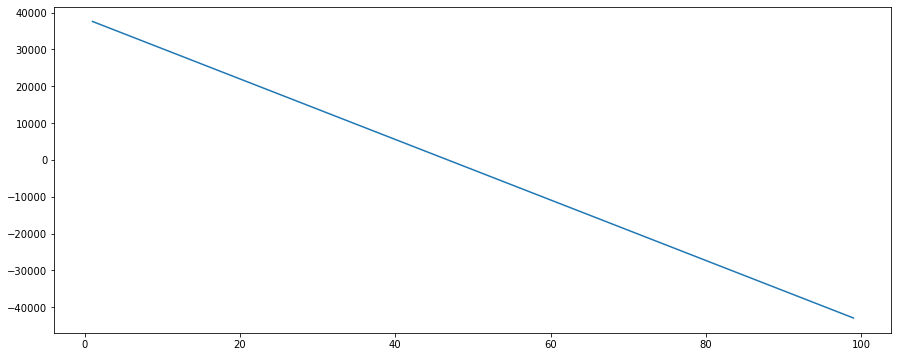

In [115]:
plt.plot(new_input, y_hat)
plt.show()

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Graph')

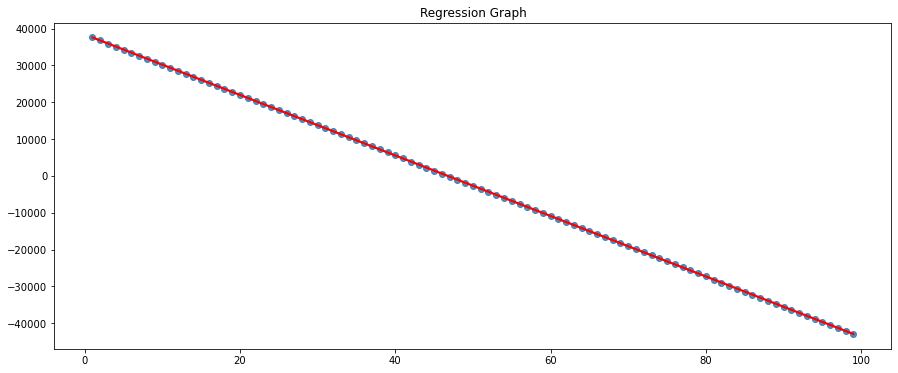

In [119]:
ax = sns.regplot(new_input, y_hat, line_kws={'color': 'red'})
ax.set_title('Regression Graph')

#### Decision Making: Determine a good model fit

Best evaluations is based on highest R^2 and smalest MSE.
In our case Multilinear Regression Model is the best model  
R^2 = 80.896%  
MSE = 1.2*10^7  
